# Part 1 - Data Preprocessing

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense #any hidden layer that u need to create then we use dense library
# from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout # dropout is basically regularization parameter & we will use it whenever neural networks are quite deep


In [ ]:
# Initialising the ANN
classifier = Sequential()  #empty neural network currently

# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 6, kernel_initializer= 'he_uniform',activation='relu',input_dim = 11))
#Whenever we are using relu activation function ,weight initialization called as 'he_uniform' and 'he_normal' works well

# all hidden layers should be having relu or leaky relu bcz those are the most famous activation func and relu prevents vanishing gradient
#problem as compared to the sigmoid

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
 # classifier.add(Dropout(0.3)) by using this accuracy is decreased

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Always remember that whenever your output is either 0 or 1 u should use binary crossentropy ,if ur ouput has multiple categories then u 
# should use categorical crossentropy

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)
# i am also going to take validation split so that i can test my dataset separately or test this model separately for the test dataset

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.6577 - accuracy: 0.6893 - val_loss: 0.5877 - val_accuracy: 0.7402
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5650 - accuracy: 0.7647 - val_loss: 0.5311 - val_accuracy: 0.7830
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5232 - accuracy: 0.7893 - val_loss: 0.5022 - val_accuracy: 0.7929
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4991 - accuracy: 0.7936 - val_loss: 0.4853 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4835 - accuracy: 0.7977 - val_loss: 0.4731 - val_accuracy: 0.7974
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4715 - accuracy: 0.7987 - val_loss: 0.4631 - val_accuracy: 0.8012
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4613 - accuracy: 0.8005 - val_loss: 0.4541 - val_accuracy: 0.8042

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


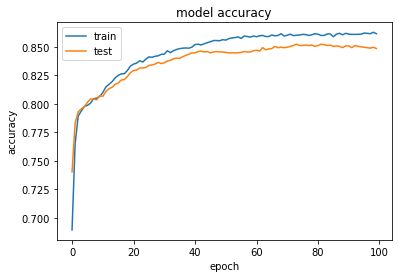

In [ ]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

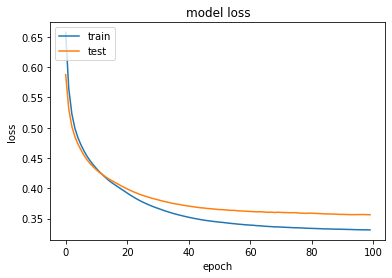

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.7975
